In [1]:
import altair as alt
from vega_datasets import data
import persist_ext as PR

PR.enable('altair')

Loaded PersIst extension version 1.1.0
Extension enabled for altair


In [2]:
source = data.seattle_weather()
source = source.rename(columns={'date': "Date new"})
source.head()

,Date new,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


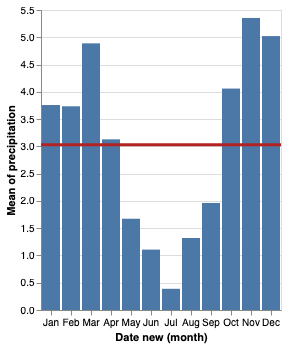

In [3]:
brush = alt.selection_interval(encodings=['x'], name="brs")


bars = alt.Chart(name="bars").mark_bar().encode(
    x='month(Date new):O',
    y='mean(precipitation):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).add_params(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(precipitation):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source)